__We are using Heart Diease data from UCI which can be found [here](https://archive.ics.uci.edu/dataset/45/heart+disease)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('Data/heart_disease/processed.cleveland.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


__Attribute Information: As mentioned in the heart-diease.names file__ 

1. (age) : age in years
2. (sex) : sex (1 = male; 0 = female)
3. (cp)  : chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. (trestbps)  : resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) : serum cholestoral in mg/dl
6. (fbs) :  (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)     
7. (restecg) :  resting electrocardiographic results
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) : maximum heart rate achieved
9. (exang) :   exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) : ST depression induced by exercise relative to rest  
11. (slope) :  the slope of the peak exercise ST segment
    *  Value 1: upsloping
    *  Value 2: flat
    *  Value 3: downsloping 
12. (ca) : number of major vessels (0-3) colored by flourosopy      
13. (thal) :  3 = normal; 6 = fixed defect; 7 = reversable defect   
14. (num) --> (the predicted attribute) : diagnosis of heart disease (angiographic disease status)
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [3]:
df.columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hd"
]

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.shape

(303, 14)

In [5]:
# Checking Missing data 

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
hd          0
dtype: int64

In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [7]:
# as we can see eventhough values in `ca` and `thal` is numbers but still data type for them coming as Object

print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


__Note__ : When we ran `isna` command on the dataframe we got 0 null values, but when checking on the columns where data type is mapped wrong, we can know that some values are mapped as `?` in the dataset which indicates the missing values. 

Now let's check how many rows have these missing values 

In [8]:
print(df['ca'].value_counts())

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64


In [9]:
print(df['thal'].value_counts())

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


In [10]:
# data points where missing values are present 
print(len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')]))
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
#  Filtering the missing values as these are very small percentage 

df1 = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
# let's check once again 

df1.loc[(df1['ca'] == '?') | (df1['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd


In [13]:
# iloc[row:column]

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [14]:
X.shape, y.shape

((297, 13), (297,))

__Performing Encoding for Categorical Values__ where we have more than two classes for features

In [15]:
# Let's check the data distribution of the input columns before proceeding for encoding 

for column in X.columns:
    values = len(list(X[column].value_counts().index))
    print(column,':',values)

age : 41
sex : 2
cp : 4
trestbps : 50
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 4
thal : 3


As we can see columns `oldpeak`, `thalach`, `chol`, `trestbps`, `age` have high number of values and 
column `sex`, `fbs`, `exang` has 2 vlaues which is aleady encoded

In [16]:
# We'll be using get_dummies for one hot encoding

X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal','ca'])

X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,True,False,...,False,False,True,False,True,False,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,False,False,...,False,True,False,True,False,False,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,False,False,...,False,True,False,False,False,True,False,False,True,False
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,False,False,...,False,False,True,True,False,False,True,False,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,False,True,...,True,False,False,True,False,False,True,False,False,False


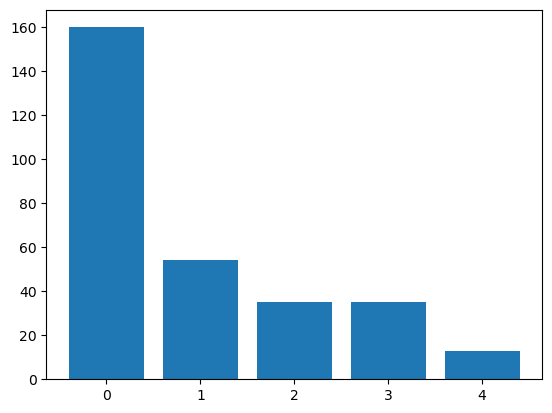

In [17]:
# Lets check out the Target Feature 

temp = pd.DataFrame(y.value_counts()).reset_index()


plt.bar(temp['hd'], temp['count'])
plt.show()

In [18]:
# Currently there more than two classes in the target variable, so we'll convert them into 0 and 1 
# [just predicting whether patient has heart disease or not] 

y = y.copy()
y[y > 0] = 1
y.value_counts()

hd
0    160
1    137
Name: count, dtype: int64

In [19]:
# Splitting the data into train and test set 

X_train, X_test, y_train, y_test  = train_test_split(X_encoded, y, test_size=.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((237, 25), (237,)), ((60, 25), (60,)))

In [20]:
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree = decisiontree.fit(X_train, y_train)
decisiontree

DecisionTreeClassifier(random_state=42)

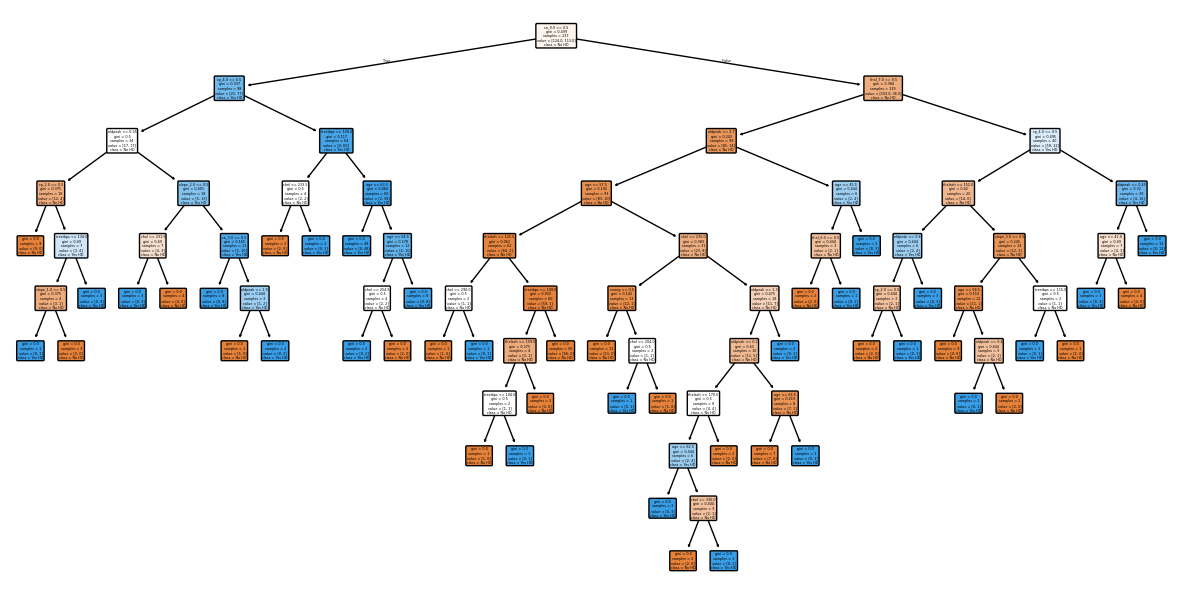

In [ ]:
plt.figure(figsize=(15, 7.5))

plot_tree(decisiontree,
          filled=True,
          rounded=True,
          class_names=['No HD', 'Yes HD'],
          feature_names=X_encoded.columns)
plt.show()

__as we can see above model is overfitting__

In [22]:
y_test.unique()

array([0, 1])

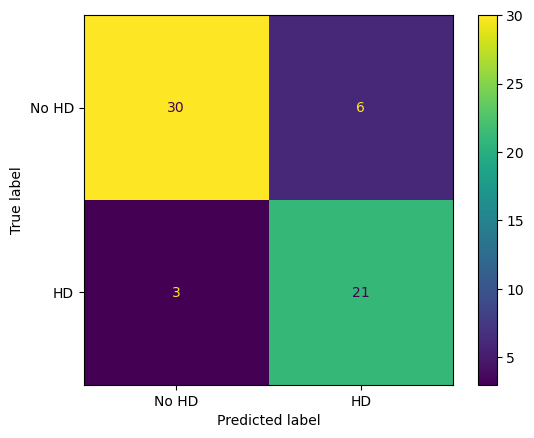

In [23]:
ConfusionMatrixDisplay.from_estimator(decisiontree,
                                      X_test, y_test,
                                      display_labels=['No HD', 'HD']
                                      )
plt.show()

__Pruning__ [https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html]

In [24]:
path = decisiontree.cost_complexity_pruning_path(X_train, y_train) # determine values of alpha 
ccp_alph = path.ccp_alphas # extract differnt values of alphs 
ccp_alph = ccp_alph[:-1]

clt_dfs = []

for i in ccp_alph:
    decisiontree = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    decisiontree.fit(X_train, y_train)
    clt_dfs.append(decisiontree)

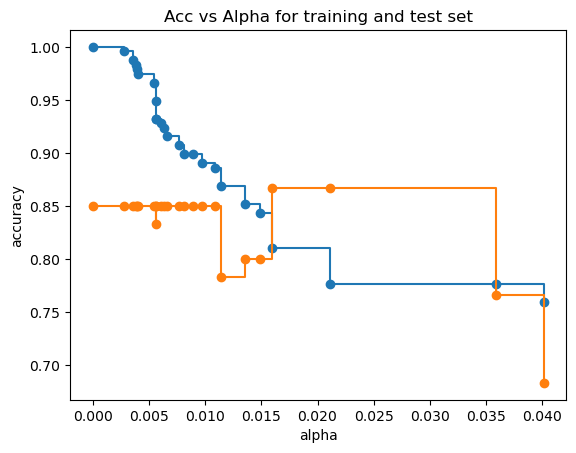

In [25]:
train_scores = [i.score(X_train, y_train) for i in clt_dfs]
test_scores = [i.score(X_test, y_test) for i in clt_dfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Acc vs Alpha for training and test set')
ax.plot(ccp_alph, train_scores, label = 'train', marker = 'o', drawstyle = 'steps-post')
ax.plot(ccp_alph, test_scores, label = 'test', marker = 'o', drawstyle = 'steps-post')
plt.show()

__K-fold Cross Validation__

In [26]:
# Keeping the same alpha value

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
scores

array([0.6875    , 0.75      , 0.70212766, 0.70212766, 0.74468085])

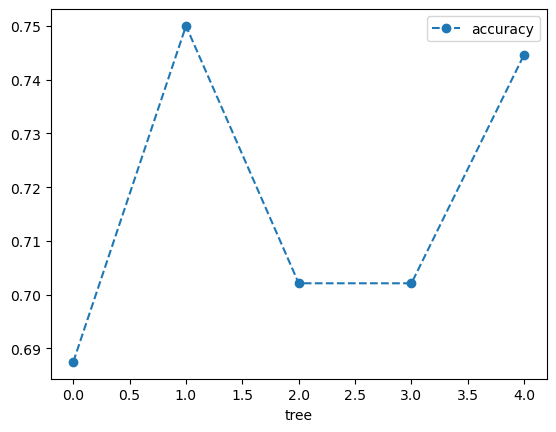

In [27]:
df = pd.DataFrame(data={'tree':range(5),
                        'accuracy':scores})
df.plot(x = 'tree',
        y = 'accuracy',
        marker = 'o',
        linestyle = '--'
        )
plt.show()

In [28]:
# doing cross validation to choose the best alpha value 

print(ccp_alph)

[0.         0.00276606 0.00361664 0.00383583 0.00389484 0.00401751
 0.00543835 0.00562588 0.00562588 0.00562588 0.0060654  0.00632911
 0.00664518 0.00766526 0.00813743 0.00889252 0.00972473 0.01084991
 0.01140093 0.01350211 0.01487036 0.01593999 0.02109705 0.03586498
 0.0401355 ]


In [31]:
# doing k-fold cross validation for getting optimal value of alpha

alpha_loop_values = []

for ccp_alph_i in ccp_alph:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alph_i)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alph_i, np.mean(scores), np.std(scores)])


alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])
alpha_results.head()

,alpha,mean_accuracy,std
0,0.000000,0.704521,0.057594
1,0.002766,0.704521,0.057594
2,0.003617,0.704521,0.057594
3,0.003836,0.704521,0.057594
4,0.003895,0.704521,0.057594


<Axes: xlabel='alpha'>

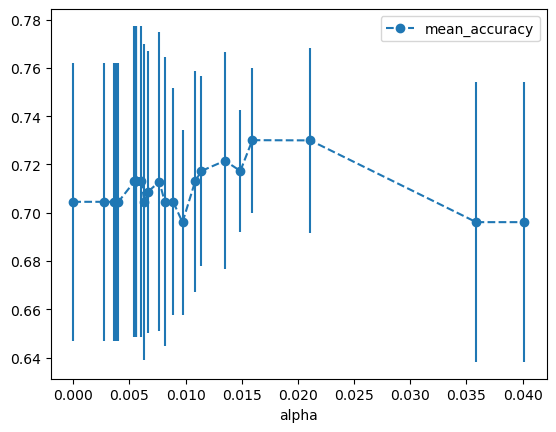

In [32]:
alpha_results.plot(x = 'alpha', y='mean_accuracy', yerr='std', marker = 'o', linestyle = '--')

In [55]:
alpha_results.sort_values(by='mean_accuracy', ascending=False)[:3]

,alpha,mean_accuracy,std
21,0.015940,0.730053,0.029972
22,0.021097,0.729965,0.038465
19,0.013502,0.721543,0.045006


In [56]:
ideal_ccp_alpha = 0.015940

In [57]:
clf_df_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)

clf_df_pruned = clf_df_pruned.fit(X_train, y_train)

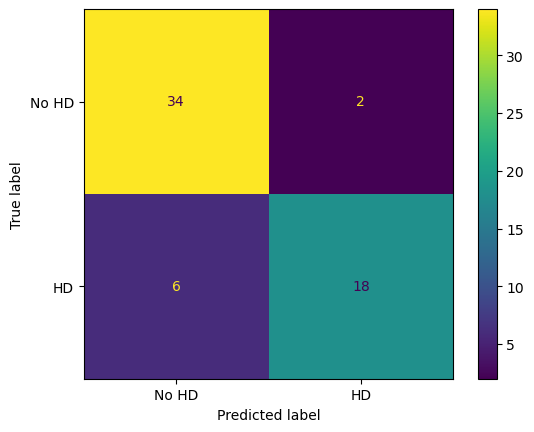

In [58]:
ConfusionMatrixDisplay.from_estimator(clf_df_pruned,
                                      X_test, y_test,
                                      display_labels=['No HD', 'HD']
                                      )
plt.show()

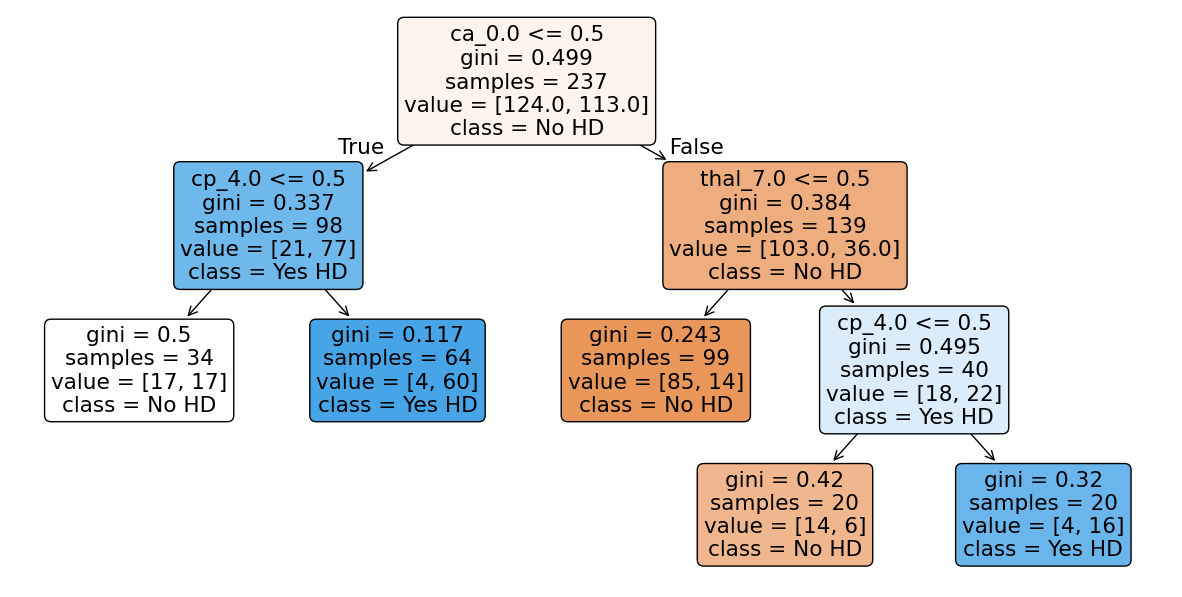

In [59]:
plt.figure(figsize=(15, 7.5))

plot_tree(clf_df_pruned,
          filled=True,
          rounded=True,
          class_names=['No HD', 'Yes HD'],
          feature_names=X_encoded.columns)
plt.show()

-----